In [70]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from datetime import date
from sqlalchemy import create_engine
import tensorflow as tf

In [71]:
# Read in data
tornado_data = pd.read_csv('tornado_data_zipcode.csv')
tornado_data

,Unnamed: 0,om,Year,Month,Day,Date,Time,Time_Zone,State,State_FIPS,...,Starting_Lon,Ending_Lat,Ending_Lon,Length,Width,fc,Income,Pop_Density,Adj_Property_Loss,zipcode
0,0,1,1950,1,3,1/3/1950,11:00:00,3,MO,29,...,-90.22,38.83,-90.03,9.50,150,0,35368.0,3115.77,29.532376,63138.0
1,1,2,1950,1,3,1/3/1950,11:55:00,3,IL,17,...,-89.30,39.12,-89.23,3.60,130,0,49840.0,24.06,2.953238,62032.0
2,2,3,1950,1,3,1/3/1950,16:00:00,3,OH,39,...,-84.58,0.00,0.00,0.10,10,0,36734.0,767.15,0.295324,45891.0
3,3,4,1950,1,13,1/13/1950,5:25:00,3,AR,5,...,-94.37,0.00,0.00,0.60,17,0,37621.0,10.65,0.029532,71937.0
4,4,5,1950,1,25,1/25/1950,19:30:00,3,MO,29,...,-90.68,37.63,-90.65,2.30,300,0,37614.0,27.70,2.953238,63650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36177,36314,607040,2015,12,27,12/27/2015,20:16:00,3,LA,22,...,-93.88,32.64,-93.88,2.27,144,0,65188.0,515.20,0.272988,71107.0
36178,36315,613277,2015,12,28,12/28/2015,4:46:00,3,AR,5,...,-90.92,34.78,-90.90,5.75,40,0,33167.0,8.00,0.054598,72360.0
36179,36316,607307,2015,12,28,12/28/2015,5:43:00,3,MS,28,...,-89.53,31.61,-89.49,5.59,100,0,34676.0,40.85,0.109195,39479.0
36180,36317,612738,2015,12,28,12/28/2015,8:30:00,3,FL,12,...,-87.24,30.77,-87.23,0.78,75,0,78587.0,175.61,0.010920,32571.0


In [72]:
# Remove any NANs from Census columns
tornado_data = tornado_data.replace(r'^s*$', float('NaN'), regex = True)
tornado_data.dropna(inplace = True)
tornado_data

,Unnamed: 0,om,Year,Month,Day,Date,Time,Time_Zone,State,State_FIPS,...,Starting_Lon,Ending_Lat,Ending_Lon,Length,Width,fc,Income,Pop_Density,Adj_Property_Loss,zipcode
0,0,1,1950,1,3,1/3/1950,11:00:00,3,MO,29,...,-90.22,38.83,-90.03,9.50,150,0,35368.0,3115.77,29.532376,63138.0
1,1,2,1950,1,3,1/3/1950,11:55:00,3,IL,17,...,-89.30,39.12,-89.23,3.60,130,0,49840.0,24.06,2.953238,62032.0
2,2,3,1950,1,3,1/3/1950,16:00:00,3,OH,39,...,-84.58,0.00,0.00,0.10,10,0,36734.0,767.15,0.295324,45891.0
3,3,4,1950,1,13,1/13/1950,5:25:00,3,AR,5,...,-94.37,0.00,0.00,0.60,17,0,37621.0,10.65,0.029532,71937.0
4,4,5,1950,1,25,1/25/1950,19:30:00,3,MO,29,...,-90.68,37.63,-90.65,2.30,300,0,37614.0,27.70,2.953238,63650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36177,36314,607040,2015,12,27,12/27/2015,20:16:00,3,LA,22,...,-93.88,32.64,-93.88,2.27,144,0,65188.0,515.20,0.272988,71107.0
36178,36315,613277,2015,12,28,12/28/2015,4:46:00,3,AR,5,...,-90.92,34.78,-90.90,5.75,40,0,33167.0,8.00,0.054598,72360.0
36179,36316,607307,2015,12,28,12/28/2015,5:43:00,3,MS,28,...,-89.53,31.61,-89.49,5.59,100,0,34676.0,40.85,0.109195,39479.0
36180,36317,612738,2015,12,28,12/28/2015,8:30:00,3,FL,12,...,-87.24,30.77,-87.23,0.78,75,0,78587.0,175.61,0.010920,32571.0


In [73]:
# Split our preprocessed data into our features and target arrays
y = tornado_data['Adj_Property_Loss']
tornado_data = tornado_data.drop(columns=['Adj_Property_Loss','Property_Loss', 'Date', 'Time','om','Year','Day',
                                          'Time_Zone','State','State_No','fc', 'Unnamed: 0','Starting_Lat','Starting_Lon','Ending_Lat','Ending_Lon'])
tornado_data

,Month,State_FIPS,Magnitude,Injuries,Fatalities,Crop_Loss,Length,Width,Income,Pop_Density,zipcode
0,1,29,3,3,0,0.0,9.50,150,35368.0,3115.77,63138.0
1,1,17,3,3,0,0.0,3.60,130,49840.0,24.06,62032.0
2,1,39,1,1,0,0.0,0.10,10,36734.0,767.15,45891.0
3,1,5,3,1,1,0.0,0.60,17,37621.0,10.65,71937.0
4,1,29,2,5,0,0.0,2.30,300,37614.0,27.70,63650.0
...,...,...,...,...,...,...,...,...,...,...,...
36177,12,22,1,0,0,0.0,2.27,144,65188.0,515.20,71107.0
36178,12,5,2,0,0,0.0,5.75,40,33167.0,8.00,72360.0
36179,12,28,1,0,0,0.0,5.59,100,34676.0,40.85,39479.0
36180,12,12,1,0,0,0.0,0.78,75,78587.0,175.61,32571.0


In [74]:
# Convert categorical data to numeric with `pd.get_dummies`
tornado_data = pd.get_dummies(tornado_data, drop_first=True)
len(tornado_data.columns)

11

In [75]:
X_train, X_test, y_train, y_test = train_test_split(tornado_data, y, test_size=0.2)

In [76]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [77]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=200, activation="relu", input_dim=11))

# Second hidden layer
nn_model.add(tf.keras.layers.Dense(units=100, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1))

# Check the structure of the model
nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 200)               2400      
                                                                 
 dense_16 (Dense)            (None, 100)               20100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 22,601
Trainable params: 22,601
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="mse", optimizer="rmsprop", metrics=["mae"])

# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=120)

Epoch 1/120
892/892 [==============================] - 2s 1ms/step - loss: 4049.6663 - mae: 5.0846
Epoch 2/120
892/892 [==============================] - 1s 1ms/step - loss: 3850.8367 - mae: 5.1297
Epoch 3/120
892/892 [==============================] - 1s 1ms/step - loss: 3945.4719 - mae: 5.2073
Epoch 4/120
892/892 [==============================] - 1s 1ms/step - loss: 3886.7539 - mae: 5.0792
Epoch 5/120
892/892 [==============================] - 1s 1ms/step - loss: 3850.8359 - mae: 5.1418
Epoch 6/120
892/892 [==============================] - 1s 1ms/step - loss: 3846.9973 - mae: 5.1437
Epoch 7/120
892/892 [==============================] - 1s 1ms/step - loss: 3873.6711 - mae: 5.0133
Epoch 8/120
892/892 [==============================] - 1s 1ms/step - loss: 3794.1934 - mae: 4.9627
Epoch 9/120
892/892 [==============================] - 1s 1ms/step - loss: 3936.8826 - mae: 4.9705
Epoch 10/120
892/892 [==============================] - 1s 1ms/step - loss: 3912.7644 - mae: 4.9697
Epoch 11/

892/892 [==============================] - 1s 1ms/step - loss: 3809.9209 - mae: 5.0963
Epoch 84/120
892/892 [==============================] - 1s 1ms/step - loss: 3737.7092 - mae: 4.9786
Epoch 85/120
892/892 [==============================] - 1s 1ms/step - loss: 3836.2656 - mae: 5.2383
Epoch 86/120
892/892 [==============================] - 1s 1ms/step - loss: 3789.6484 - mae: 4.9490
Epoch 87/120
892/892 [==============================] - 1s 1ms/step - loss: 3797.3291 - mae: 4.9026
Epoch 88/120
892/892 [==============================] - 1s 1ms/step - loss: 3790.6504 - mae: 4.8958
Epoch 89/120
892/892 [==============================] - 1s 1ms/step - loss: 3778.9067 - mae: 4.9375
Epoch 90/120
892/892 [==============================] - 1s 1ms/step - loss: 3855.8125 - mae: 5.0405
Epoch 91/120
892/892 [==============================] - 1s 1ms/step - loss: 3819.7571 - mae: 5.0658
Epoch 92/120
892/892 [==============================] - 1s 1ms/step - loss: 3852.5994 - mae: 4.9818
Epoch 93/120


<AxesSubplot:>

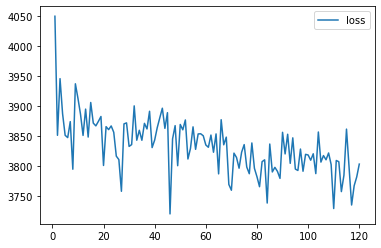

In [79]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

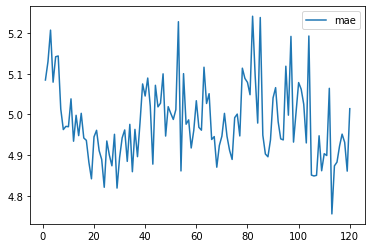

In [80]:
# Plot the accuracy
history_df.plot(y="mae")

In [81]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

223/223 - 0s - loss: 5307.3740 - mae: 5.2285 - 271ms/epoch - 1ms/step
Loss: 5307.3740234375, Accuracy: 5.228491306304932
